# 1. Предсказание цены на недвижимость

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

### Данные

в sklearn есть модуль, содержащий набор классических датасетов, воспользуемся им:

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
X, y = load_boston(return_X_y=True)

In [7]:
X.shape

(506, 13)

In [8]:
y.shape

(506,)

### Формирование выборок

Разделим данные на 2 части, обучающую и тренировочную выборки:
1. фиксируем размер обучающей выборки
2. выделяем подмассивы из X, y

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, shuffle=True) # shuffle перемешивает выборку
print(X_train.shape)
print(y_test.shape)

(404, 13)
(102,)


### Построение регрессии и предсказания по тестовой выборке

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=12)
# lr?
lr.fit(X_train, y_train)

LinearRegression(n_jobs=12)

In [11]:
y_pred = lr.predict(X_test)

In [12]:
y_pred.shape

(102,)

In [13]:
y_test.shape

(102,)

### Оценка

In [14]:
import numpy as np

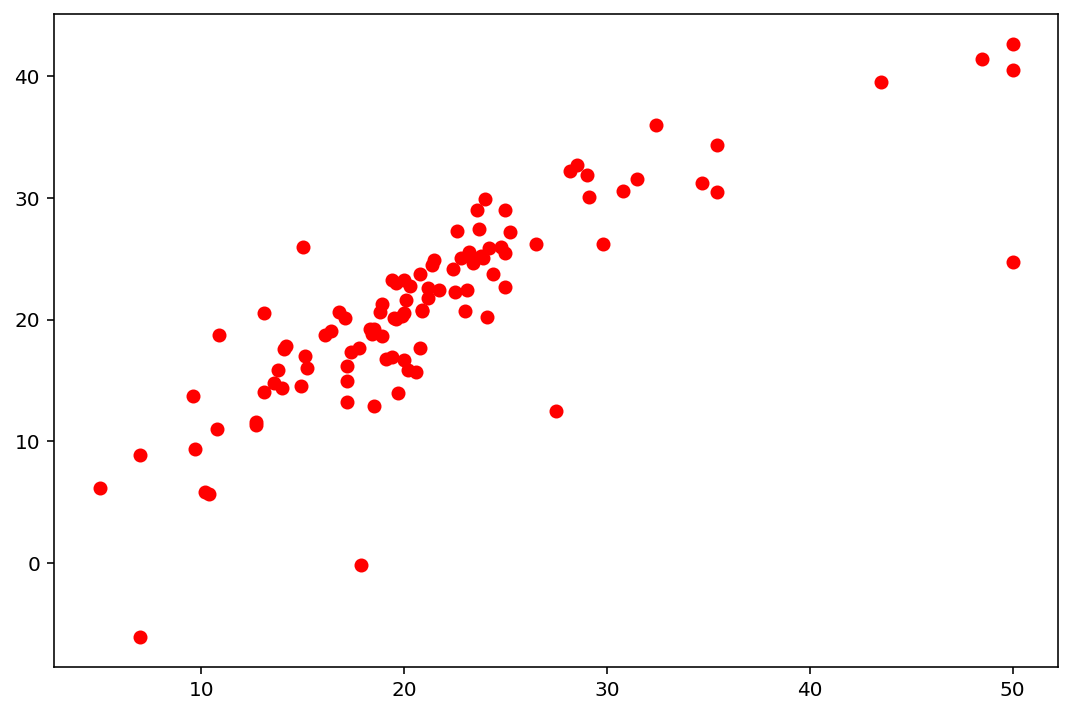

In [15]:
plt.plot(y_test, y_pred, 'ro');

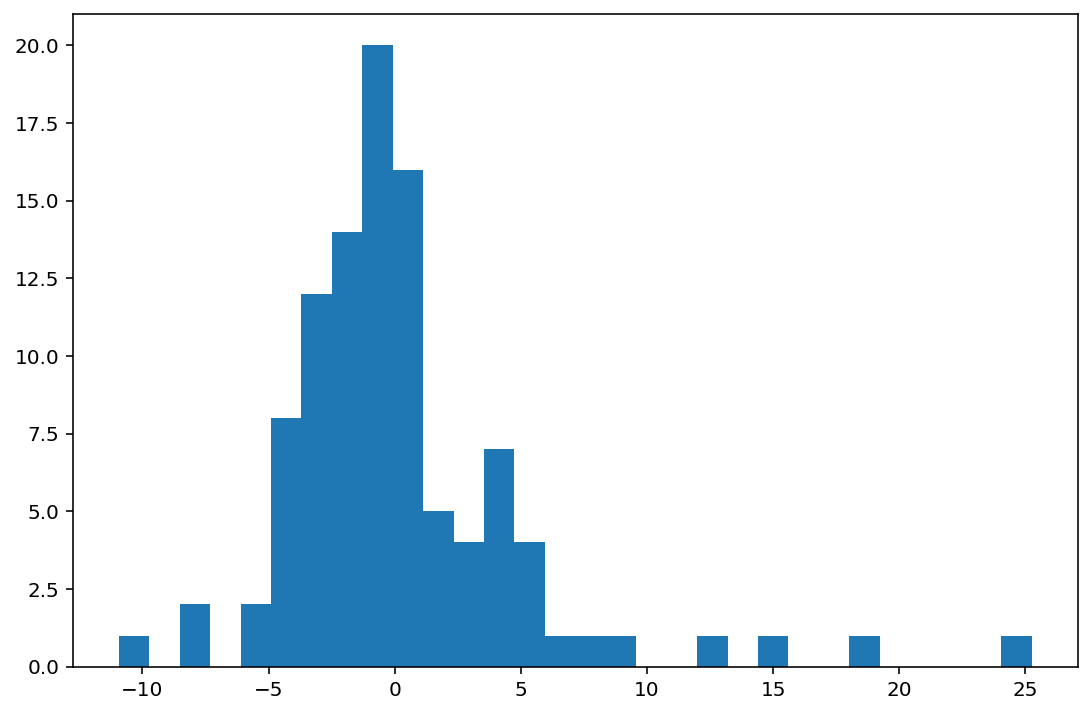

In [16]:
plt.hist(y_test - y_pred, bins=30);

### MSE

In [17]:
mse = np.mean((y_test - y_pred) ** 2)
print('mse', mse)
print('sqrt(mse)', mse**0.5)
print('avg_error', np.mean(abs(y_test - y_pred)))

mse 24.291119474973335
sqrt(mse) 4.928602182665318
avg_error 3.1890919658878145


In [18]:
feature_names = load_boston()['feature_names']

In [19]:
import pandas as pd

df = pd.DataFrame(X, columns=feature_names)

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot:>

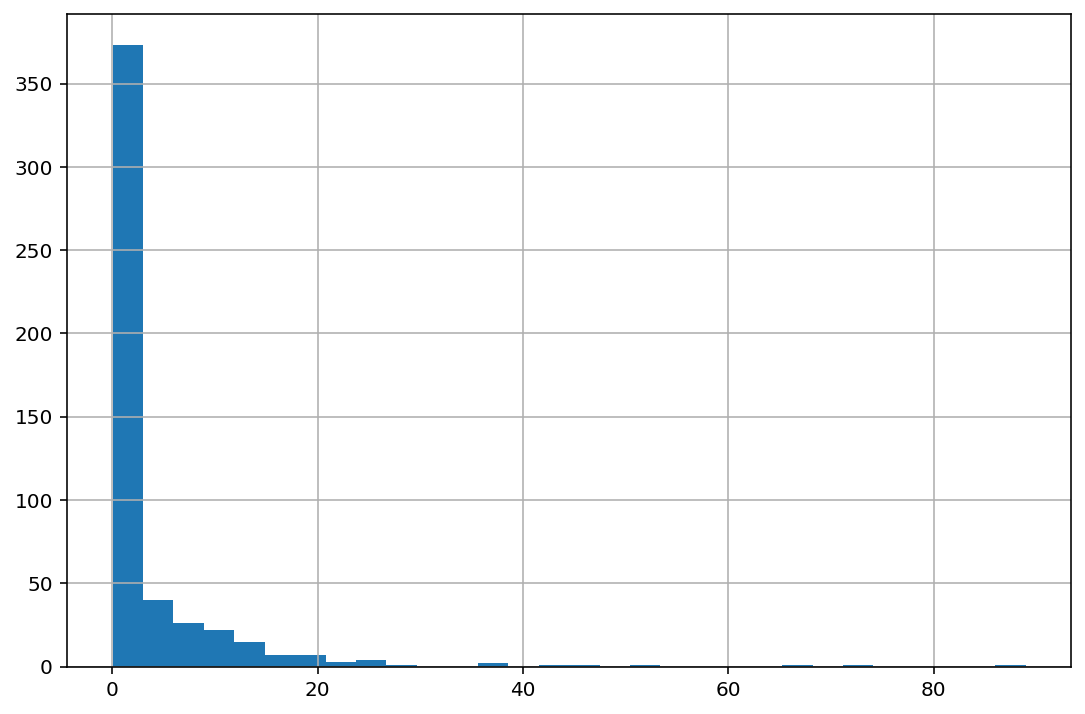

In [21]:
df.CRIM.hist(bins=30)

## Титаник. Кто выживет?

https://www.kaggle.com/c/titanic/

In [22]:
import numpy as np
import pandas as pd

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

### Данные

In [24]:
train = pd.read_csv('datasets/titanic/train.csv')
test = pd.read_csv('datasets/titanic/test.csv')

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train.Pclass.value_counts() # Если хотим посмотреть в процестном соотношении надо передать normalize=True

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### EDA

Разведочный анализ данных (exploratory data analysis, EDA)

In [29]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
train.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [31]:
# sns.boxplot?

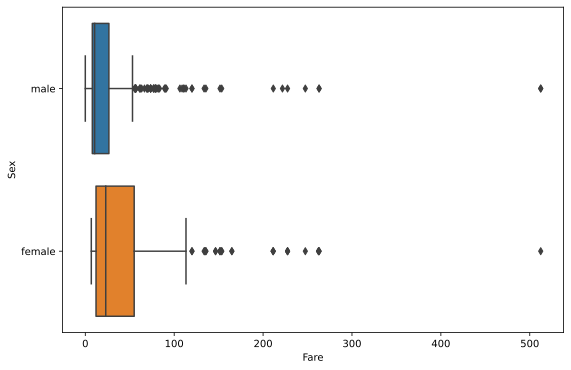

In [32]:
sns.boxplot(data=train, x='Fare', y='Sex');

In [33]:
train.groupby('Sex')['Pclass'].value_counts(normalize=True)

Sex     Pclass
female  3         0.458599
        1         0.299363
        2         0.242038
male    3         0.601386
        1         0.211438
        2         0.187175
Name: Pclass, dtype: float64

### Фичи

чтобы одинаковым образом обработать train и test и не дублировать все операции 2 раза, соединим  эти два набора данных в один, не забыв при этом: 

1. выкинуь целевую переменную из набора train
2. провериь на соответствие набора признаков друг другу
3. добавиь флаг того, является ли объект тестовым или нет

In [34]:
y_train = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [35]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [36]:
train['is_test'] = 0
test['is_test'] = 1

In [37]:
df = pd.concat([train, test])

In [38]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_test
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [39]:
df.Sex.value_counts(dropna=False)

male      843
female    466
Name: Sex, dtype: int64

супер, теперь полный набор данных можно обрабатывать вместе и в любой момент, уже обработанными, обратно разъединить на обучающую и тестовую выборки

Пол male/female закодируем в 1/0 и удалим переменные, с которыми мы не будем сейчас работать

In [40]:
df['isMale'] = df.Sex.replace({'male': 1, 'female': 0})
df.drop(['Sex', 'Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

признаки, значения которых представляют небольшой перечислимый набор, закодируем в отдельные столбцы

In [41]:
df_dummies = pd.get_dummies(df, columns=['Pclass', 'Embarked'])

In [42]:
df_dummies.head()

,Age,SibSp,Parch,Fare,is_test,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [43]:
df_dummies.isnull().sum()

Age           263
SibSp           0
Parch           0
Fare            1
is_test         0
isMale          0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [44]:
X_train = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

In [45]:
columns = X_train.columns

In [46]:
X_train.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,1,0,0,1
5,NaN,0,0,8.4583,1,0,0,1,0,1,0
6,54.0,0,0,51.8625,1,1,0,0,0,0,1
7,2.0,3,1,21.0750,1,0,0,1,0,0,1
8,27.0,0,2,11.1333,0,0,0,1,0,0,1
9,14.0,1,0,30.0708,0,0,1,0,1,0,0


### Заполнение пустых значений

заполним пустые значения средним по соответствующим признакам

In [47]:
from sklearn.impute import SimpleImputer as Imputer

In [48]:
imputer = Imputer(strategy='mean', verbose=0, copy=True)

In [49]:
imputer.fit(X_train)

SimpleImputer()

In [50]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns)

In [51]:
X_train_imputed.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.000000,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.000000,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.000000,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.000000,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,29.699118,0.0,0.0,8.4583,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,54.000000,0.0,0.0,51.8625,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,2.000000,3.0,1.0,21.0750,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,27.000000,0.0,2.0,11.1333,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,14.000000,1.0,0.0,30.0708,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Нормировка значений

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X_train_imputed_scaled = scaler.fit_transform(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=columns)

In [55]:
X_train_imputed_scaled.head()

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
1,0.638789,0.432793,-0.473674,0.786845,-1.355574,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710
2,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
3,0.407926,0.432793,-0.473674,0.420730,-1.355574,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
4,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306


In [56]:
X_test_imputed_scaled = scaler.transform(imputer.transform(X_test))

**Offtop попробуем видуализировать всех пассажиров, есть ли там кластеры?**

### PCA + clustering 

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=2)

In [59]:
ppl = pca.fit_transform(X_train_imputed_scaled)

Всего 2 фичи объясняют 41% всего разнообразия пассажиров

In [60]:
pca.explained_variance_ratio_

array([0.23192102, 0.17825452])

In [61]:
pca.explained_variance_ratio_.sum()

0.41017554160207315

классно видно 6 кластеров пассажиров, внутри кластера  они похожи друг на друга, между кластерами - нет:

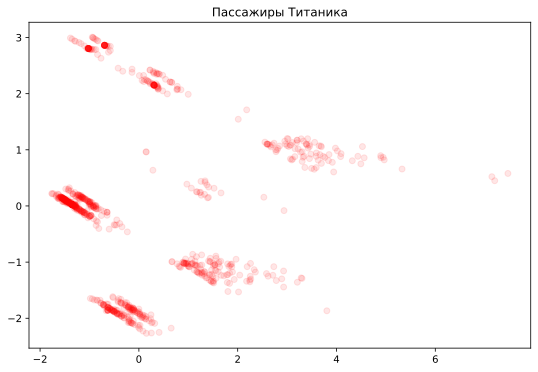

In [62]:
plt.plot(ppl[:, 0], ppl[:, 1], 'ro', alpha=.1)
plt.title('Пассажиры Титаника');

Можно попрлбовать кластеризовать по 7 кластерам и посмотреть, что получится

In [63]:
from sklearn.cluster import KMeans

In [64]:
n_clusters = 7

In [65]:
kmeans = KMeans(n_clusters)

In [66]:
kmeans.fit(X_train_imputed_scaled)

KMeans(n_clusters=7)

In [67]:
cluster_labels = kmeans.predict(X_train_imputed_scaled)

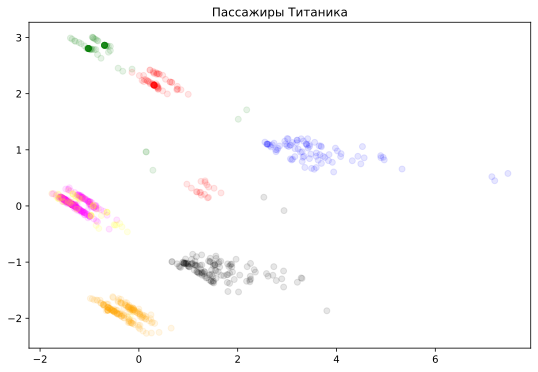

In [68]:
plt.title('Пассажиры Титаника')
for i,color in zip(range(n_clusters), {'blue', 'green', 'yellow', 'magenta', 'orange', 'black', 'red'}):
    t = ppl[cluster_labels==i]
    plt.plot(t[:, 0], t[:, 1], 'o', alpha=.1, c=color)

эти номера кластеров можно было бы подать как ещё одна фича

### Разделение на обучающую и тестовую выборки

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train_fin, X_val, y_train_fin, y_val = train_test_split(X_train_imputed_scaled, y_train, test_size=.2)

In [71]:
X_train_fin.shape

(712, 11)

In [72]:
X_val.shape

(179, 11)

In [73]:
X_test_imputed_scaled.shape

(418, 11)

In [74]:
y_train_fin.shape

(712,)

In [75]:
y_val.shape

(179,)

### Обучение с кросс-валидацией

кросс валидация поможет нам подобрать лучший параметр регуляризации

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [77]:
cs = 10 ** np.linspace(-3, 1, 5)
cs

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [78]:
grid = {'C': cs} # {max features} : features_num
gridsearch = GridSearchCV(LogisticRegression(), grid, scoring='accuracy', cv=5)

In [79]:
%%time
gridsearch.fit(X_train_fin, y_train_fin)

Wall time: 285 ms


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])},
             scoring='accuracy')

In [80]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00679569, 0.00679522, 0.00859423, 0.00979376, 0.01000028]),
 'std_fit_time': array([0.00039973, 0.00040009, 0.00079945, 0.00074775, 0.00063152]),
 'mean_score_time': array([0.00199852, 0.00199866, 0.00159888, 0.00179863, 0.00200005]),
 'std_score_time': array([6.32183515e-04, 2.61174468e-07, 4.89628863e-04, 3.99589738e-04,
        2.65662923e-06]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1.0}, {'C': 10.0}],
 'split0_test_score': array([0.65034965, 0.76223776, 0.79020979, 0.79020979, 0.76923077]),
 'split1_test_score': array([0.65734266, 0.84615385, 0.86013986, 0.85314685, 0.85314685]),
 'split2_test_score': array([0.66197183, 0.76056338, 0.74647887, 0.71126761, 0.71126761]),
 'split3_test_score': array([0.66901408, 0.73943662, 0.76760563, 0.76760563, 0.76760563]),
 'split4_tes

In [81]:
gridsearch.best_params_

{'C': 0.1}

In [82]:
best_C = gridsearch.best_params_['C']

# Оценка точности

In [83]:
from sklearn.metrics import accuracy_score

In [84]:
clf = LogisticRegression(C=best_C)

In [85]:
clf.fit(X_train_fin, y_train_fin)

LogisticRegression(C=0.1)

In [86]:
y_val_pred = clf.predict(X_val)

In [87]:
accuracy_score(y_val, y_val_pred)

0.8044692737430168

### Финальное предсказание

In [88]:
clf.fit(X_train_imputed_scaled, y_train)

LogisticRegression(C=0.1)

предсказание вероятностей принадлежности классу 0 и 1:

In [89]:
clf.predict_proba(X_test_imputed_scaled)[:10]

array([[0.87649901, 0.12350099],
       [0.6417722 , 0.3582278 ],
       [0.84954145, 0.15045855],
       [0.89260444, 0.10739556],
       [0.45480625, 0.54519375],
       [0.84381763, 0.15618237],
       [0.34253088, 0.65746912],
       [0.77537932, 0.22462068],
       [0.25178258, 0.74821742],
       [0.91741891, 0.08258109]])

предсказание номера класса:

In [90]:
predictions = clf.predict(X_test_imputed_scaled)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [91]:
submussion = 'PassengedId,Survived\n'
submussion += "\n".join([f'{pid}, {prediction}' for pid, prediction in zip(test.PassengerId, predictions)])

In [92]:
with open('submission.txt', 'w') as file:
    file.write(submussion)

In [93]:
for col, val in zip(X_train.columns, clf.coef_[0]):
    print(f'{col:30} {val:.2f}')

Age                            -0.43
SibSp                          -0.29
Parch                          -0.06
Fare                           0.13
isMale                         -1.18
Pclass_1                       0.43
Pclass_2                       0.09
Pclass_3                       -0.45
Embarked_C                     0.06
Embarked_Q                     0.03
Embarked_S                     -0.13


Регрессия позволяет посмотреть влияние различных факторов на принятое решение. Так, видно, что женский пол, маленький возраст и первый класс являлись сильными предпосылками к выживанию